### Name = Ganpat Patidar , ID = prep0122231

# Machine Learning Project

Objective:
Your task is to write a small Python that predicts the engine rating based on the inspection parameters using only the provided dataset. You need to find all the cases/outliers where the rating has been given incorrectly as compared to current condition of the engine.
 
This task is designed to test your Python ability, your knowledge of Data Science techniques, your ability to find trends, outliers, relative importance of variables with deviation in target variable and your ability to work effectively, efficiently and independently within a commercial setting.
 
This task is designed as well to test your hyper-tuning abilities or lateral thinking.
 
Deliverables:
·     	One Python Script
·     	Summary of your insights
·     	List of cases which are outliers/incorrectly rated as high or low and it should be backed with analysis/reasons.
·        model object files for reproducibility.
 
 
Your solution should at a minimum do the following:
·     	Load the data into memory
·     	Prepare the data for modelling
·     	EDA of the variables
·     	Build a model on training data
·     	Test the model on testing data
·     	Provide some measure of performance
·     	Outlier analysis and detection
 


# EDA

- import required library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- load data

In [2]:
file_path = "ML Data.xlsx"

df = pd.read_excel(file_path, sheet_name = 0)

In [4]:
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-03-02 15:43:00,2008.0,8.0,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600.0,3.0
1,aj_02,1/16/19 13:02,2007.0,5.0,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108.0,4.0
2,aj_03,2019-09-02 13:31:00,2012.0,5.0,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348.0,3.5
3,aj_04,1/18/19 11:02,2013.0,1.0,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233.0,3.5
4,aj_05,1/27/19 12:12,2011.0,7.0,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   appointmentId                                              26307 non-null  object 
 1   inspectionStartTime                                        26307 non-null  object 
 2   year                                                       26307 non-null  float64
 3   month                                                      26307 non-null  float64
 4   engineTransmission_battery_value                           26307 non-null  object 
 5   engineTransmission_battery_cc_value_0                      3438 non-null   object 
 6   engineTransmission_battery_cc_value_1                      430 non-null    object 
 7   engineTransmission_battery_cc_value_2                      72 non-null     object 
 8   engine

- numerical columns

In [72]:
df_num = df.select_dtypes(include = ['float64'])
df_num.columns

Index(['year', 'month', 'odometer_reading', 'rating_engineTransmission'], dtype='object')

- correlation

In [73]:
df.corr()["rating_engineTransmission"].sort_values()

odometer_reading            -0.363514
month                        0.113850
year                         0.586463
rating_engineTransmission    1.000000
Name: rating_engineTransmission, dtype: float64

In [86]:
pd.set_option('display.max_rows', 73)
df.isnull().sum()

appointmentId                                                    0
inspectionStartTime                                              0
year                                                             0
month                                                            0
engineTransmission_battery_value                                 0
engineTransmission_battery_cc_value_0                        22818
engineTransmission_battery_cc_value_1                        25814
engineTransmission_battery_cc_value_2                        26172
engineTransmission_battery_cc_value_3                        26225
engineTransmission_battery_cc_value_4                        26237
engineTransmission_engineoilLevelDipstick_value                  0
engineTransmission_engineOilLevelDipstick_cc_value_0         25831
engineTransmission_engineOil                                     0
engineTransmission_engineOil_cc_value_0                       7734
engineTransmission_engineOil_cc_value_1                      1

In [ ]:
def fun(f):
    if 

- remoove column who's null value is greater then 80%

In [21]:
df=df[df.columns[df.isnull().mean()< 0.80]]

In [22]:
df.shape

(26307, 30)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   appointmentId                                              26307 non-null  object 
 1   inspectionStartTime                                        26307 non-null  object 
 2   year                                                       26307 non-null  float64
 3   month                                                      26307 non-null  float64
 4   engineTransmission_battery_value                           26307 non-null  object 
 5   engineTransmission_engineoilLevelDipstick_value            26307 non-null  object 
 6   engineTransmission_engineOil                               26307 non-null  object 
 7   engineTransmission_engineOil_cc_value_0                    18557 non-null  object 
 8   engine

- fill null value with yes as mentions in dataset

In [39]:
k =df.fillna("Yes")

In [24]:
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,...,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-03-02 15:43:00,2008.0,8.0,No,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,...,No,White,No,Back Compression Exist,No,Spongy,Yes,Petrol + CNG,124600.0,3.0
1,aj_02,1/16/19 13:02,2007.0,5.0,Yes,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,...,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,78108.0,4.0
2,aj_03,2019-09-02 13:31:00,2012.0,5.0,Yes,Yes,No,Dirty,NaN,NaN,...,No,Black,Yes,Perm. Blow By on idle,No,Hard,Yes,Diesel,93348.0,3.5
3,aj_04,1/18/19 11:02,2013.0,1.0,Yes,Yes,No,Dirty,NaN,NaN,...,Yes,NaN,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG,48233.0,3.5
4,aj_05,1/27/19 12:12,2011.0,7.0,Yes,Yes,No,Leaking,Leakage from Tappet Cover,NaN,...,No,White,Yes,NO Blow-by,No,Spongy,Yes,Petrol + CNG,74368.0,4.0


In [25]:
df.shape

(26307, 30)

- remove outliesrs

In [26]:
df=df.drop(df[(df["fuel_type"]=="Hybrid")].index)
df=df.drop(df[(df["fuel_type"]=="Electric")].index)
df=df.drop(df[(df["fuel_type"]=="Petrol + LPG")].index)

In [27]:
df.fuel_type.value_counts()

Petrol          10719
Diesel           9895
Petrol + CNG     5627
Name: fuel_type, dtype: int64

In [28]:
categorical_columns = df.select_dtypes('O').columns
continuous_columns = [cols for cols in df.columns if cols not in categorical_columns]

In [29]:
len(categorical_columns)

26

In [30]:
len(continuous_columns)

4

In [31]:
continuous_columns


['year', 'month', 'odometer_reading', 'rating_engineTransmission']

In [32]:
df.describe()

,year,month,odometer_reading,rating_engineTransmission
count,26241.000000,26241.000000,26241.000000,26241.000000
mean,2010.863344,5.463740,76465.567890,3.625091
std,3.762894,3.583997,46764.554654,0.847558
min,1989.000000,1.000000,1.000000,0.500000
25%,2008.000000,2.000000,46425.000000,3.500000
50%,2011.000000,5.000000,72027.000000,4.000000
75%,2014.000000,9.000000,98271.000000,4.000000
max,2019.000000,12.000000,999999.000000,5.000000


-  graphs ,visualization

C:\Users\Dell\Downloads\python\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


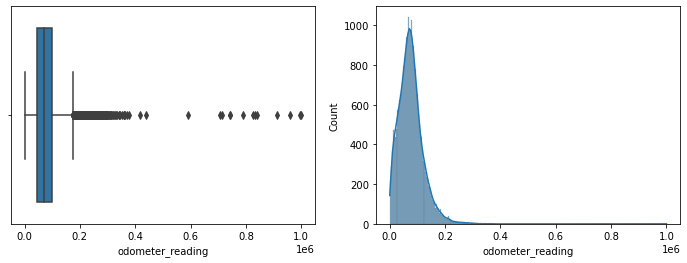

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(df['odometer_reading'], ax=ax[0])
sns.histplot(df['odometer_reading'], kde=True, ax=ax[1])
plt.show()

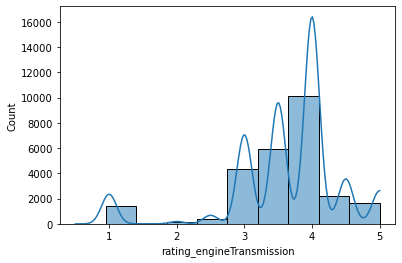

In [34]:
sns.histplot(data=df, x='rating_engineTransmission', bins=10, kde=True)
plt.show()

In [35]:
df['rating_engineTransmission'].value_counts() 

4.0    10131
3.5     5932
3.0     4361
4.5     2203
5.0     1621
1.0     1452
2.5      418
2.0      116
1.5        6
0.5        1
Name: rating_engineTransmission, dtype: int64

In [36]:
df.drop(['appointmentId', 'inspectionStartTime', ], axis=1, inplace=True)

In [37]:
df.head()

,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,...,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,2008.0,8.0,No,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,No,Repaired,...,No,White,No,Back Compression Exist,No,Spongy,Yes,Petrol + CNG,124600.0,3.0
1,2007.0,5.0,Yes,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,No,RPM fluctuating,...,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,78108.0,4.0
2,2012.0,5.0,Yes,Yes,No,Dirty,NaN,NaN,Yes,NaN,...,No,Black,Yes,Perm. Blow By on idle,No,Hard,Yes,Diesel,93348.0,3.5
3,2013.0,1.0,Yes,Yes,No,Dirty,NaN,NaN,Yes,NaN,...,Yes,NaN,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG,48233.0,3.5
4,2011.0,7.0,Yes,Yes,No,Leaking,Leakage from Tappet Cover,NaN,No,RPM fluctuating,...,No,White,Yes,NO Blow-by,No,Spongy,Yes,Petrol + CNG,74368.0,4.0


In [40]:
k.isnull().sum()

year                                                         0
month                                                        0
engineTransmission_battery_value                             0
engineTransmission_engineoilLevelDipstick_value              0
engineTransmission_engineOil                                 0
engineTransmission_engineOil_cc_value_0                      0
engineTransmission_engineOil_cc_value_1                      0
engineTransmission_engineOil_cc_value_2                      0
engineTransmission_engine_value                              0
engineTransmission_engine_cc_value_0                         0
engineTransmission_coolant_value                             0
engineTransmission_coolant_cc_value_0                        0
engineTransmission_engineMounting_value                      0
engineTransmission_engineMounting_cc_value_0                 0
engineTransmission_engineSound_value                         0
engineTransmission_engineSound_cc_value_0              

C:\Users\Dell\Downloads\python\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


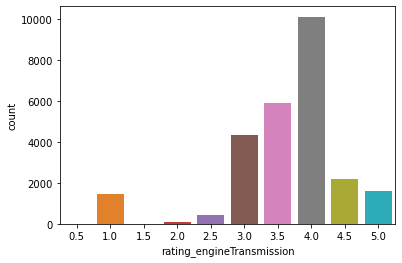

In [77]:
sns.countplot(df['rating_engineTransmission'])
plt.show()

C:\Users\Dell\Downloads\python\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month'>

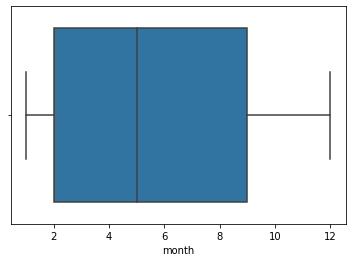

In [80]:
sns.boxplot(df["month"])

C:\Users\Dell\Downloads\python\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

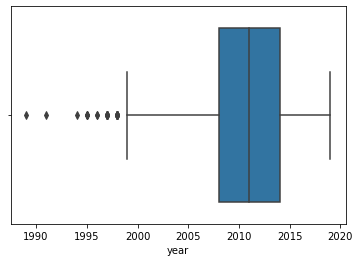

In [81]:
sns.boxplot(df["year"])

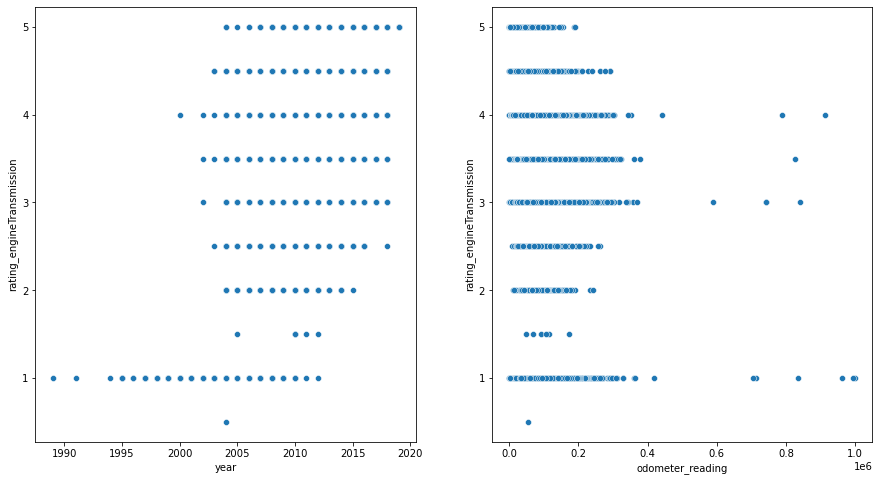

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(data=df, x='year', y='rating_engineTransmission', ax=ax[0])
sns.scatterplot(data=df, x='odometer_reading', y='rating_engineTransmission', ax=ax[1])
plt.show()

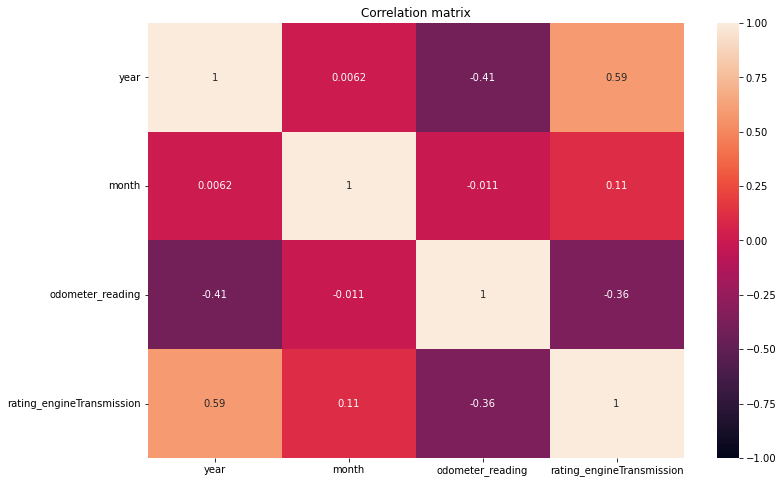

In [74]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, vmax=1.0, vmin=-1.0, annot=True)

plt.title('Correlation matrix')
plt.show()

In [59]:
df.head()

,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,...,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,2008.0,8.0,No,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,No,Repaired,...,No,White,No,Back Compression Exist,No,Spongy,Yes,Petrol + CNG,124600.0,3.0
1,2007.0,5.0,Yes,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,No,RPM fluctuating,...,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,78108.0,4.0
2,2012.0,5.0,Yes,Yes,No,Dirty,NaN,NaN,Yes,NaN,...,No,Black,Yes,Perm. Blow By on idle,No,Hard,Yes,Diesel,93348.0,3.5
3,2013.0,1.0,Yes,Yes,No,Dirty,NaN,NaN,Yes,NaN,...,Yes,NaN,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG,48233.0,3.5
4,2011.0,7.0,Yes,Yes,No,Leaking,Leakage from Tappet Cover,NaN,No,RPM fluctuating,...,No,White,Yes,NO Blow-by,No,Spongy,Yes,Petrol + CNG,74368.0,4.0


# Data Preprocessing and feature selection

In [88]:
# 1. Split into training set & target
train = k.drop('rating_engineTransmission', axis=1).reset_index().drop('index', axis=1)
target = k['rating_engineTransmission'].reset_index().drop('index', axis=1)

# 2. Encode the categorical variables
train_encoded = pd.get_dummies(train, drop_first=True)



In [89]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(train_encoded), columns=train_encoded.columns)
y = target

### train test split

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# Split the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [84]:
pred=model.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error
 
mean_squared_error(y_test, pred)

4.793128276342812e+17

## so our independent variable is a continious variable                                        that's why we can not use classification                                                            for that we use REGRESSION

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# K Neighbors Regressor

In [96]:
# Generating KFold Split for cross validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 1. Building KNN model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# Print the R squared scores
knn_train_score = knn.score(X_train, y_train)
knn_val_score = knn.score(X_val, y_val)
knn_test_score = knn.score(X_test, y_test)

print(knn_train_score, knn_val_score,knn_test_score)

0.7445715647546234 0.6328903893407444 0.5929531104812935


# Decision Tree Regressor

In [112]:
# 2. Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Print the R squared scores
dt_train_score = dt.score(X_train, y_train)
dt_val_score = dt.score(X_val, y_val)
print(dt_train_score, dt_val_score)

1.0 0.4775119647821471


In [113]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred))


In [101]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_transformed)

knn_train_score = knn.score(X_train, y_train)
knn_val_score = knn.score(X_val, y_val)
knn_test_score = knn.score(X_test, y_test)

print(knn_train_score, knn_val_score,knn_test_score)

0.7445715647546234 0.6328903893407444 0.5929531104812935


# Random Forest Regressor

In [99]:
# 3. Random Forest 
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Print the R squared scores
rf_train_score = rf.score(X_train, y_train)
rf_val_score = rf.score(X_val, y_val)
print(rf_train_score, rf_val_score)

C:\Users\Dell\AppData\Local\Temp/ipykernel_1444/2713709483.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.9607439250205136 0.7338856979935853


In [124]:
random_pred=rf.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score

In [127]:
print(accuracy_score(y_test, random_pred))

ValueError: continuous is not supported

- result

In [121]:

model = {'train_socres' : [knn_train_score, dt_train_score, rf_train_score], 
                     'validation_scores' : [knn_val_score, dt_val_score, rf_val_score]}
output = pd.DataFrame(model, index=['KNN', 'DecisionTree', 'RandomForest'])
output

,train_socres,validation_scores
KNN,0.744572,0.632890
DecisionTree,1.000000,0.477512
RandomForest,0.960744,0.733886


-  KNN, DecisionTree models are giving results with overfitting.
-  RandomForest models which are showing generalization.
-  Proceeding with RandomForest.

## THE END